In [1]:
import sys
import numpy as np
sys.path.append(r'../')

import pandas as pd
import numpy as np
from numpy import *
from scipy.optimize import minimize

import matplotlib
import matplotlib.pyplot as plt

from spl_train import run_spl
import matplotlib.font_manager as font_manager

from sklearn.metrics import mean_squared_error


In [2]:
output_folder = 'results_spl/' ## directory to save discovered results
save_eqs = True                ## if true, discovered equations are saved to "output_folder" dir

font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='bold',
                                   style='normal', size=36)

In [3]:
balldrop_exp = ['Baseball',
                'Blue Basketball',
                'Green Basketball',
                'Volleyball',
                'Bowling Ball',
                'Golf Ball',
                'Tennis Ball',
                'Whiffle Ball 1',
                'Whiffle Ball 2',
                'Yellow Whiffle Ball',
                'Orange Whiffle Ball']

baseline_models = ['C+C*x+C*x**2+C*x**3', 
                   'C+C*x+C*exp(C*x)', 
                   'C+C*log(cosh(C*x))']

In [4]:
def solve_model(eq, data):
    x = data[0, :]
    f_true = data[1, :]
    c_count = eq.count('C')
    c_lst = ['c'+str(i) for i in range(c_count)]
    for c in c_lst: 
        eq = eq.replace('C', c, 1)

    def eq_test(c):
        x = data[0, :]
        for i in range(len(c)): 
            globals()['c'+str(i)] = c[i]
        return np.linalg.norm(eval(eq) - f_true, 2)
    
    x0 = [1.0] * len(c_lst)
    c_lst = minimize(eq_test, x0, method='Powell', tol=1e-6).x.tolist()
    c_lst = [np.round(x, 3) if abs(x) > 1e-2 else 0 for x in c_lst]
    eq_est = eq
    for i in range(len(c_lst)):
        eq_est = eq_est.replace('c'+str(i), str(c_lst[i]), 1)
    eq = eq_est.replace('+-', '-')
    y_pred = eval(eq)

    return eq


def pred_with_baseline_model(model, train_sample, test_sample):
    eq_model = solve_model(model, train_sample)
    print(eq_model)
    x = test_sample[0, :]
    f_pred = eval(eq_model)
    return f_pred

In [5]:
import importlib
import sys
importlib.reload(sys.modules['spl_train'])
from spl_train import run_spl

### run SRL and baseline models on all ball drop data

task :Baseball
47.682+1.456*x-5.629*x**2+0.376*x**3
45.089-8.156*x+5.448*exp(0*x)
48.049-213.625*log(cosh(0.201*x))

test 0
Episode 2000/2000, current best reward 0.9856855174609297.
1 tests complete after 3 iterations.


findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font famil

best solution: -6.1684000000000001*x**2 + 1.7766999999999999*x + 1.32275315*log(cosh(x**2)) + 47.665355599108359
test score: 0.8501305424016035

MSE of SRL prediction 0.176
MSE of Model-1 prediction 2.798
MSE of Model-2 prediction 94.589
MSE of Model-3 prediction 2.993


findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.


FileNotFoundError: [Errno 2] No such file or directory: 'pictures/Baseball.svg'

findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font famil

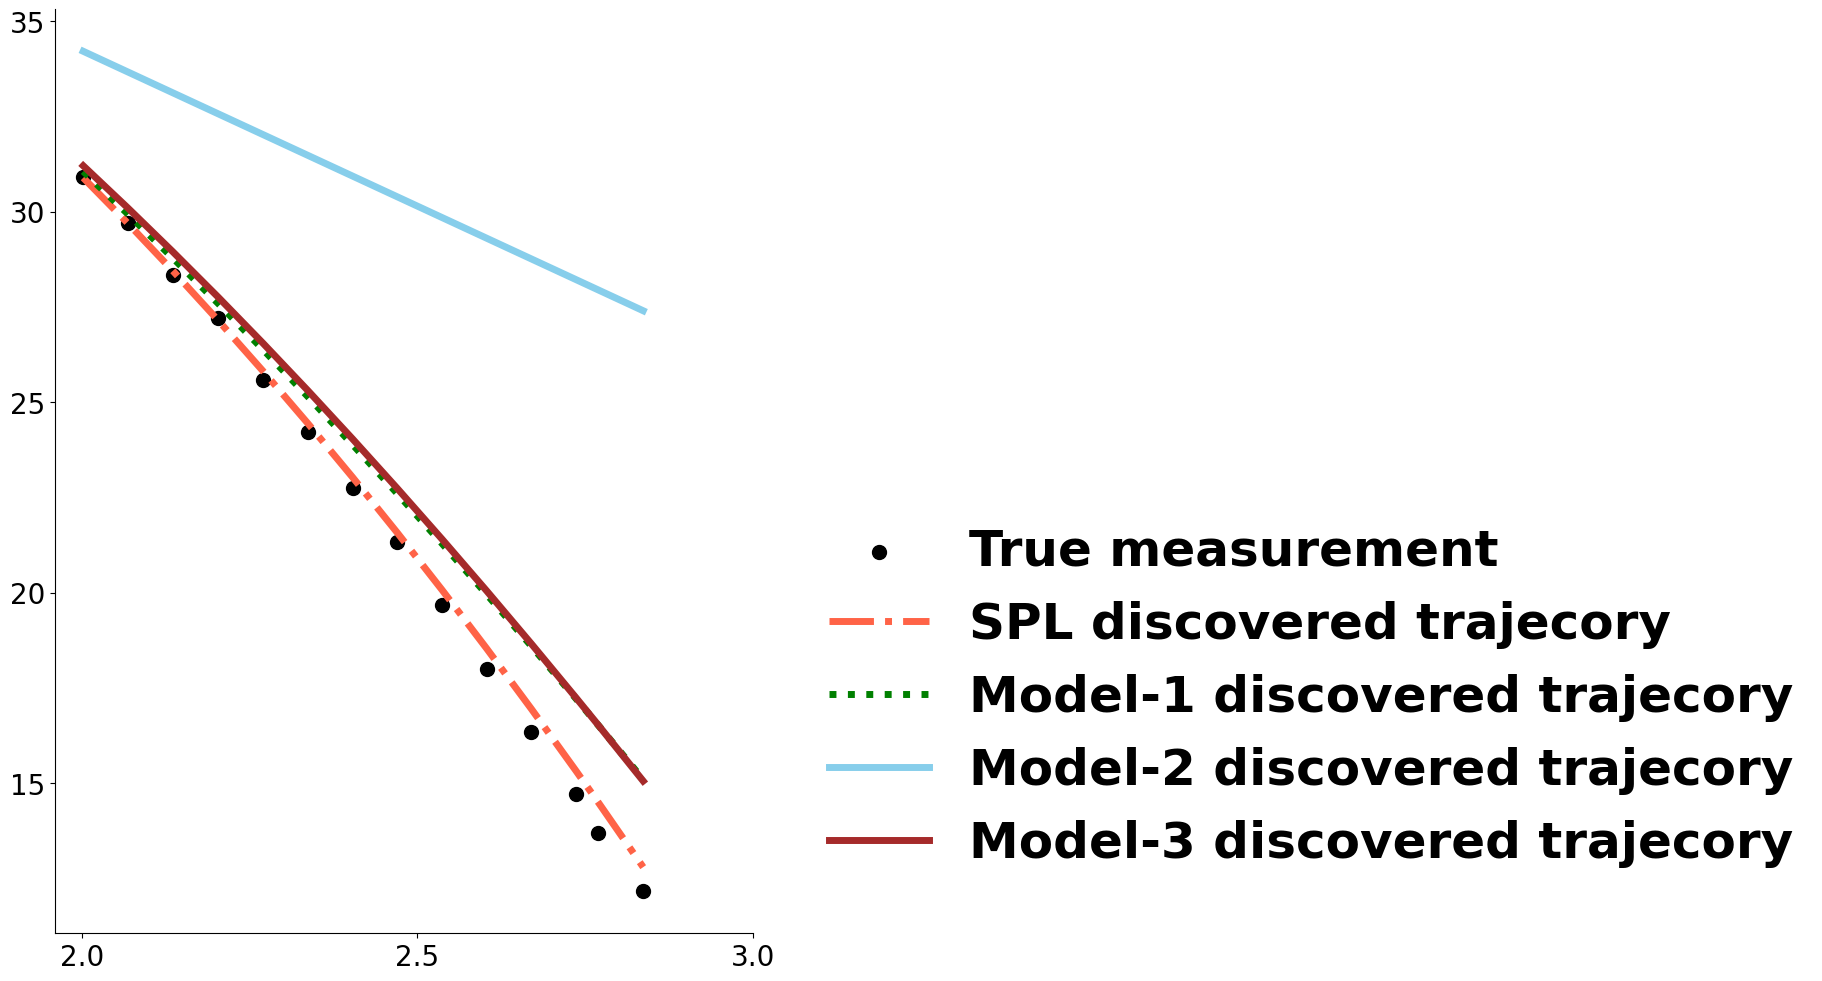

In [6]:
for task in balldrop_exp: 

    print('task :' + task)
    
    train_sample = pd.read_csv('data/' + task + '_train.csv', header=None).to_numpy().T
    test_sample = pd.read_csv('data/' + task + '_test.csv', header=None).to_numpy().T

    f_model1 = pred_with_baseline_model(baseline_models[0], train_sample, test_sample)
    f_model2 = pred_with_baseline_model(baseline_models[1], train_sample, test_sample)
    f_model3 = pred_with_baseline_model(baseline_models[2], train_sample, test_sample)
    print()
    
    all_eqs, _, _ = run_spl(task, 
                            num_run=1, 
                            max_len=20,
                            eta=1-1e-3, 
                            num_transplant=3, 
                            num_aug=0,
                            transplant_step=2000, 
                            count_success=False)
    x = test_sample[0, :]
    f_true = test_sample[1, :]
    f_srl = eval(all_eqs[0])
    
    print('MSE of SRL prediction', np.round(mean_squared_error(f_true,f_srl), 3))
    print('MSE of Model-1 prediction', np.round(mean_squared_error(f_true,f_model1), 3))
    print('MSE of Model-2 prediction', np.round(mean_squared_error(f_true,f_model2), 3))
    print('MSE of Model-3 prediction', np.round(mean_squared_error(f_true,f_model3), 3))
    
    fig = plt.figure(figsize=(9, 12))
    ax = fig.add_subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.scatter(x, f_true, s=100, color='black', label="True measurement")
    ax.plot(x, f_srl, '-.', c='tomato', lw=5, label="SPL discovered trajecory")
    ax.plot(x, f_model1, ':', c='green', lw=5, label="Model-1 discovered trajecory")
    ax.plot(x, f_model2, '-', c='skyblue', lw=5, label="Model-2 discovered trajecory")
    ax.plot(x, f_model3, '-', c='brown', lw=5, label="Model-3 discovered trajecory")
    ax.set_xticks(np.arange(2, 3.001, 0.5))
    ax.set_xticklabels(np.arange(2, 3.001, 0.5))
    plt.legend(loc=[1.08, 0.05], frameon=False, fontsize=30, prop=font)
    ax.tick_params(axis='both', which='major', labelsize=20)
    # ax.axes.xaxis.set_visible(False)
    # ax.axes.yaxis.set_visible(False)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    fig.savefig('pictures/' + task + '.svg', bbox_inches='tight')
    plt.show()
